In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import random

### COCO2014 Path

In [20]:
COCO_Root = '/Users/robert/Mask_RCNN/coco'
Val_data = 'val2014'
Train_data = 'train2014'
annFile = os.path.join(COCO_Root, f'annotations/instances_{Val_data}.json')
capFile = os.path.join(COCO_Root, f'annotations/captions_{Val_data}.json')
print(f'Annotation file: {annFile}')

Annotation file: /Users/robert/Mask_RCNN/coco/annotations/instances_val2014.json


In [21]:
coco = COCO(capFile)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


In [37]:
im

{'license': 3,
 'file_name': 'COCO_val2014_000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

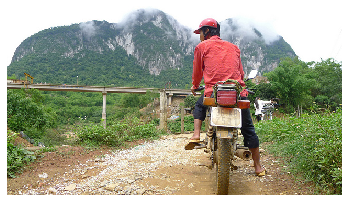

[{'image_id': 391895,
  'id': 770337,
  'caption': 'A man with a red helmet on a small moped on a dirt road. '},
 {'image_id': 391895,
  'id': 771687,
  'caption': 'Man riding a motor bike on a dirt road on the countryside.'},
 {'image_id': 391895,
  'id': 772707,
  'caption': 'A man riding on the back of a motorcycle.'},
 {'image_id': 391895,
  'id': 776154,
  'caption': 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. '},
 {'image_id': 391895,
  'id': 781998,
  'caption': 'A man in a red shirt and a red hat is on a motorcycle on a hill side.'}]

In [38]:
im = coco.dataset['images'][0]
annIds = coco.getAnnIds(imgIds=im['id'])
anns = coco.loadAnns(annIds)
imPath = os.path.join(COCO_Root, Val_data, im['file_name'])                     
im = cv2.imread(imPath)
im = im[:,:,[2,1,0]]
plt.axis('off')
plt.imshow(im)
plt.show()
anns

#### initialize COCO API for instance annotations

In [3]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=4.38s)
creating index...
index created!


#### 1.数据集总览

In [4]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO 类别: \n{}'.format('\t'.join(nms)))
print('总类别数: {}'.format(len(nms)))

COCO 类别: 
person	bicycle	car	motorcycle	airplane	bus	train	truck	boat	traffic light	fire hydrant	stop sign	parking meter	bench	bird	cat	dog	horse	sheep	cow	elephant	bear	zebra	giraffe	backpack	umbrella	handbag	tie	suitcase	frisbee	skis	snowboard	sports ball	kite	baseball bat	baseball glove	skateboard	surfboard	tennis racket	bottle	wine glass	cup	fork	knife	spoon	bowl	banana	apple	sandwich	orange	broccoli	carrot	hot dog	pizza	donut	cake	chair	couch	potted plant	bed	dining table	toilet	tv	laptop	mouse	remote	keyboard	cell phone	microwave	oven	toaster	sink	refrigerator	book	clock	vase	scissors	teddy bear	hair drier	toothbrush
总类别数: 80


#### 2. 获取ID和类别

In [5]:
# 获取特定某一类的ID
ids = coco.getCatIds('person')
print(f'"person" 对应的序号: {ids}')
cats = coco.loadCats(1)
print(f'"1" 对应的类别名称: {cats}')
# 获取包含person的所有图片
imgIds = coco.getImgIds(catIds=[1])
ID = coco.getCatIds('dog')[0]
img_ids = coco.catToImgs[ID] #second 
print(f'包含person的图片共有：{len(imgIds)}张')
print(f'包含dog的图片共有：{len(img_ids)}张')

"person" 对应的序号: [1]
"1" 对应的类别名称: [{'supercategory': 'person', 'id': 1, 'name': 'person'}]
包含person的图片共有：21634张
包含dog的图片共有：1952张


#### 3.图片信息展示

图像131115的信息如下：
{'license': 3, 'file_name': 'COCO_val2014_000000131115.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000131115.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-23 01:12:15', 'flickr_url': 'http://farm7.staticflickr.com/6128/6014748203_f8b4869379_z.jpg', 'id': 131115}


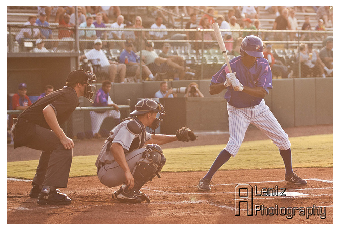

In [13]:
imgId = imgIds[20]
imgInfo = coco.loadImgs(imgId)[0]
print(f'图像{imgId}的信息如下：\n{imgInfo}')
imPath = os.path.join(COCO_Root, Val_data, imgInfo['file_name'])                     
im = cv2.imread(imPath)
im = im[:,:,[2,1,0]]
plt.axis('off')
plt.imshow(im)
plt.show()

#### 4.展示图像的annotation

图像131115包含16个ann对象，分别是:
[481729, 497815, 519639, 523501, 561076, 565364, 632426, 634294, 1216538, 1255300, 1279482, 1284578, 1712347, 1740212, 2004511, 900100131115]


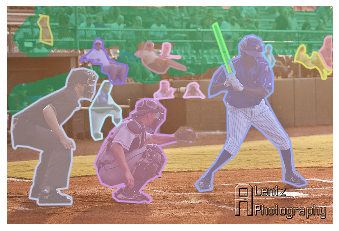

In [16]:
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=imgInfo['id'])
anns = coco.loadAnns(annIds)
print(f'图像{imgInfo["id"]}包含{len(anns)}个ann对象，分别是:\n{annIds}')
coco.showAnns(anns)

ann565364对应的mask如下：


(-0.5, 639.5, 427.5, -0.5)

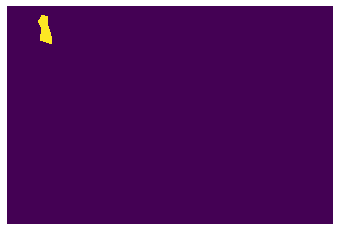

In [19]:
print(f'ann{annIds[5]}对应的mask如下：')
mask = coco.annToMask(anns[5])
plt.imshow(mask); plt.axis('off')